In [1]:
import tensorflow as tf
import numpy as np
import pprint
import matplotlib.pyplot as plt
import random

pp = pprint.PrettyPrinter(width=20,indent=6)

In [2]:
xy = np.loadtxt('test01.csv', delimiter=',', dtype=np.float32)

random.shuffle(xy)
dataX = xy[:, 0:-1]
dataY = xy[:, [-1]]

In [3]:
# Make sure the shape and data are OK
print(dataX.shape, dataX, len(dataX))
print(dataY.shape, dataY, len(dataY))

(4466, 6) [[  7.89342150e-02   4.76190485e-02   4.00491655e-02   7.63942022e-04
    1.33888438e-01   2.39644974e-01]
 [  4.20921072e-02   1.42857149e-01   7.04287412e-03   6.49350658e-02
    2.91924253e-02   3.75739634e-01]
 [  7.89342150e-02   4.76190485e-02   4.00491655e-02   7.63942022e-04
    1.33888438e-01   2.39644974e-01]
 ..., 
 [  1.30263402e-03   1.42857149e-01   3.55259702e-03   3.52177233e-01
    1.77316004e-04   2.57396460e-01]
 [  5.25000319e-03   9.52380970e-02   1.54683962e-02   8.03666949e-01
    1.65294148e-02   3.22485209e-01]
 [  4.47236858e-02   9.52380970e-02   1.57282259e-02   8.03666949e-01
    1.97263267e-02   2.54437864e-01]] 4466
(4466, 1) [[ 7.69999981]
 [ 6.0999999 ]
 [ 7.69999981]
 ..., 
 [ 3.79999995]
 [ 7.19999981]
 [ 5.69999981]] 4466


In [4]:
# train/test split
train_size = int(len(dataY) * 0.8)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])

In [5]:
print(trainX)

[[  7.89342150e-02   4.76190485e-02   4.00491655e-02   7.63942022e-04
    1.33888438e-01   2.39644974e-01]
 [  4.20921072e-02   1.42857149e-01   7.04287412e-03   6.49350658e-02
    2.91924253e-02   3.75739634e-01]
 [  7.89342150e-02   4.76190485e-02   4.00491655e-02   7.63942022e-04
    1.33888438e-01   2.39644974e-01]
 ..., 
 [  3.94723684e-01   9.52380970e-02   1.81025974e-02   5.34759415e-03
    7.36062527e-02   3.87573957e-01]
 [  1.31565794e-01   1.42857149e-01   1.86973959e-02   8.03666949e-01
    5.11992499e-02   3.49112421e-01]
 [  7.63026327e-02   9.52380970e-02   2.32720971e-02   8.25057328e-02
    1.10825457e-01   3.81656796e-01]]


In [6]:
feature = 6
learning_rate=0.005
training_epochs = 3000

In [7]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None,feature])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([feature, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [8]:
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

#weights & bias for nn layers (fully-connected)
nb_Ly1 = 256
nb_Ly2 = 256
nb_Ly3 = 256
nb_Ly4 = 256


W1 = tf.get_variable("W1", shape=[feature, nb_Ly1],
                     initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([nb_Ly1]))
L1 = tf.nn.relu(tf.matmul(X,W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[nb_Ly1, nb_Ly2],
                     initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([nb_Ly2]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[nb_Ly2, nb_Ly3],
                     initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([nb_Ly3]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[nb_Ly3, nb_Ly4],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([nb_Ly4]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[nb_Ly4, 1],
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([1]))
hypothesis = tf.matmul(L4, W5) + b5

In [9]:
cost = tf.reduce_mean(tf.square(hypothesis-trainY))
optimizer =  tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [11]:
for epoch in range(training_epochs):
    
    feed_dict = {X: trainX, Y: trainY, keep_prob: 0.7}
    c, _, resultY = sess.run([cost, optimizer, hypothesis], feed_dict=feed_dict)

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(c))
    
print('Learning Finished!')

Epoch: 0001 cost = 37.189888000
Epoch: 0002 cost = 89.365066528
Epoch: 0003 cost = 4.174599171
Epoch: 0004 cost = 7.284701347
Epoch: 0005 cost = 14.336659431
Epoch: 0006 cost = 16.432481766
Epoch: 0007 cost = 14.819741249
Epoch: 0008 cost = 11.606141090
Epoch: 0009 cost = 7.376067162
Epoch: 0010 cost = 3.893687248
Epoch: 0011 cost = 2.138321638
Epoch: 0012 cost = 2.363526106
Epoch: 0013 cost = 4.002461910
Epoch: 0014 cost = 4.788038731
Epoch: 0015 cost = 4.578231812
Epoch: 0016 cost = 3.417906761
Epoch: 0017 cost = 2.480098486
Epoch: 0018 cost = 1.940194607
Epoch: 0019 cost = 1.797346711
Epoch: 0020 cost = 1.990972042
Epoch: 0021 cost = 2.256393671
Epoch: 0022 cost = 2.351553202
Epoch: 0023 cost = 2.422708273
Epoch: 0024 cost = 2.357238054
Epoch: 0025 cost = 2.141696930
Epoch: 0026 cost = 2.048229456
Epoch: 0027 cost = 1.918595672
Epoch: 0028 cost = 1.757452965
Epoch: 0029 cost = 1.712363362
Epoch: 0030 cost = 1.693333983
Epoch: 0031 cost = 1.754133582
Epoch: 0032 cost = 1.772522807
Ep

Epoch: 0266 cost = 1.087444305
Epoch: 0267 cost = 1.072581649
Epoch: 0268 cost = 1.097942710
Epoch: 0269 cost = 1.094449162
Epoch: 0270 cost = 1.150149345
Epoch: 0271 cost = 1.094944715
Epoch: 0272 cost = 1.119506478
Epoch: 0273 cost = 1.106511831
Epoch: 0274 cost = 1.107413292
Epoch: 0275 cost = 1.079636216
Epoch: 0276 cost = 1.098819256
Epoch: 0277 cost = 1.064115882
Epoch: 0278 cost = 1.110879660
Epoch: 0279 cost = 1.120837808
Epoch: 0280 cost = 1.108223796
Epoch: 0281 cost = 1.047693491
Epoch: 0282 cost = 1.119763732
Epoch: 0283 cost = 1.095756769
Epoch: 0284 cost = 1.049785852
Epoch: 0285 cost = 1.088339567
Epoch: 0286 cost = 1.093321443
Epoch: 0287 cost = 1.064700723
Epoch: 0288 cost = 1.115408540
Epoch: 0289 cost = 1.067881823
Epoch: 0290 cost = 1.118661761
Epoch: 0291 cost = 1.067397118
Epoch: 0292 cost = 1.042440534
Epoch: 0293 cost = 1.041578770
Epoch: 0294 cost = 1.068306327
Epoch: 0295 cost = 1.067696810
Epoch: 0296 cost = 1.076003432
Epoch: 0297 cost = 1.087538004
Epoch: 0

Epoch: 0531 cost = 0.941700339
Epoch: 0532 cost = 0.918240905
Epoch: 0533 cost = 0.928778589
Epoch: 0534 cost = 0.946001589
Epoch: 0535 cost = 0.960624814
Epoch: 0536 cost = 0.938466012
Epoch: 0537 cost = 0.968220711
Epoch: 0538 cost = 1.005084753
Epoch: 0539 cost = 0.961663842
Epoch: 0540 cost = 0.941071749
Epoch: 0541 cost = 0.961900651
Epoch: 0542 cost = 0.936913013
Epoch: 0543 cost = 0.962011516
Epoch: 0544 cost = 0.915528357
Epoch: 0545 cost = 0.953589439
Epoch: 0546 cost = 0.971469641
Epoch: 0547 cost = 0.929657042
Epoch: 0548 cost = 0.938349962
Epoch: 0549 cost = 0.915797710
Epoch: 0550 cost = 0.947769880
Epoch: 0551 cost = 0.951236546
Epoch: 0552 cost = 0.971508861
Epoch: 0553 cost = 0.944324017
Epoch: 0554 cost = 0.955707729
Epoch: 0555 cost = 0.959188461
Epoch: 0556 cost = 0.958879590
Epoch: 0557 cost = 0.941026390
Epoch: 0558 cost = 0.909895539
Epoch: 0559 cost = 0.956761181
Epoch: 0560 cost = 0.943393290
Epoch: 0561 cost = 0.937295914
Epoch: 0562 cost = 0.937012732
Epoch: 0

Epoch: 0796 cost = 0.838801980
Epoch: 0797 cost = 0.849552810
Epoch: 0798 cost = 0.821262658
Epoch: 0799 cost = 0.824686110
Epoch: 0800 cost = 0.817864954
Epoch: 0801 cost = 0.803407967
Epoch: 0802 cost = 0.829233825
Epoch: 0803 cost = 0.802767813
Epoch: 0804 cost = 0.800867081
Epoch: 0805 cost = 0.834702730
Epoch: 0806 cost = 0.804058015
Epoch: 0807 cost = 0.801240146
Epoch: 0808 cost = 0.815557778
Epoch: 0809 cost = 0.815954447
Epoch: 0810 cost = 0.803502381
Epoch: 0811 cost = 0.798112273
Epoch: 0812 cost = 0.819067597
Epoch: 0813 cost = 0.822023511
Epoch: 0814 cost = 0.801554382
Epoch: 0815 cost = 0.812339127
Epoch: 0816 cost = 0.813476622
Epoch: 0817 cost = 0.811580777
Epoch: 0818 cost = 0.822385430
Epoch: 0819 cost = 0.820442319
Epoch: 0820 cost = 0.839269161
Epoch: 0821 cost = 0.812323511
Epoch: 0822 cost = 0.830817461
Epoch: 0823 cost = 0.820212722
Epoch: 0824 cost = 0.836686075
Epoch: 0825 cost = 0.849214613
Epoch: 0826 cost = 0.845468402
Epoch: 0827 cost = 0.834202290
Epoch: 0

Epoch: 1061 cost = 0.736798763
Epoch: 1062 cost = 0.778489530
Epoch: 1063 cost = 0.768061399
Epoch: 1064 cost = 0.773690522
Epoch: 1065 cost = 0.746859252
Epoch: 1066 cost = 0.770959318
Epoch: 1067 cost = 0.775214672
Epoch: 1068 cost = 0.775114775
Epoch: 1069 cost = 0.767098427
Epoch: 1070 cost = 0.769562781
Epoch: 1071 cost = 0.765297472
Epoch: 1072 cost = 0.746961355
Epoch: 1073 cost = 0.771902442
Epoch: 1074 cost = 0.752342463
Epoch: 1075 cost = 0.754453301
Epoch: 1076 cost = 0.782624900
Epoch: 1077 cost = 0.747893155
Epoch: 1078 cost = 0.742569268
Epoch: 1079 cost = 0.764530361
Epoch: 1080 cost = 0.751225650
Epoch: 1081 cost = 0.759589016
Epoch: 1082 cost = 0.768096387
Epoch: 1083 cost = 0.768794179
Epoch: 1084 cost = 0.770182550
Epoch: 1085 cost = 0.776275456
Epoch: 1086 cost = 0.749015212
Epoch: 1087 cost = 0.755206347
Epoch: 1088 cost = 0.744740069
Epoch: 1089 cost = 0.755171776
Epoch: 1090 cost = 0.805665910
Epoch: 1091 cost = 0.760315359
Epoch: 1092 cost = 0.770357311
Epoch: 1

Epoch: 1326 cost = 0.719576597
Epoch: 1327 cost = 0.733041704
Epoch: 1328 cost = 0.692840040
Epoch: 1329 cost = 0.740444064
Epoch: 1330 cost = 0.713806570
Epoch: 1331 cost = 0.717931926
Epoch: 1332 cost = 0.736951232
Epoch: 1333 cost = 0.725411773
Epoch: 1334 cost = 0.736268103
Epoch: 1335 cost = 0.730433464
Epoch: 1336 cost = 0.713603854
Epoch: 1337 cost = 0.714685202
Epoch: 1338 cost = 0.720244527
Epoch: 1339 cost = 0.697347343
Epoch: 1340 cost = 0.751128137
Epoch: 1341 cost = 0.724950850
Epoch: 1342 cost = 0.703298330
Epoch: 1343 cost = 0.721855283
Epoch: 1344 cost = 0.727805734
Epoch: 1345 cost = 0.726425350
Epoch: 1346 cost = 0.720380247
Epoch: 1347 cost = 0.724748969
Epoch: 1348 cost = 0.746057808
Epoch: 1349 cost = 0.747283816
Epoch: 1350 cost = 0.722197890
Epoch: 1351 cost = 0.738280594
Epoch: 1352 cost = 0.715785742
Epoch: 1353 cost = 0.740509689
Epoch: 1354 cost = 0.743905962
Epoch: 1355 cost = 0.739188075
Epoch: 1356 cost = 0.716538489
Epoch: 1357 cost = 0.736796975
Epoch: 1

Epoch: 1591 cost = 0.707481503
Epoch: 1592 cost = 0.708450735
Epoch: 1593 cost = 0.666883230
Epoch: 1594 cost = 0.718256533
Epoch: 1595 cost = 0.735407352
Epoch: 1596 cost = 0.686638534
Epoch: 1597 cost = 0.685014725
Epoch: 1598 cost = 0.703768075
Epoch: 1599 cost = 0.709894657
Epoch: 1600 cost = 0.709406376
Epoch: 1601 cost = 0.695896864
Epoch: 1602 cost = 0.697422206
Epoch: 1603 cost = 0.684106290
Epoch: 1604 cost = 0.704084277
Epoch: 1605 cost = 0.696857333
Epoch: 1606 cost = 0.692038119
Epoch: 1607 cost = 0.689772427
Epoch: 1608 cost = 0.695562243
Epoch: 1609 cost = 0.691064775
Epoch: 1610 cost = 0.700806797
Epoch: 1611 cost = 0.710616291
Epoch: 1612 cost = 0.692189515
Epoch: 1613 cost = 0.688012898
Epoch: 1614 cost = 0.708758295
Epoch: 1615 cost = 0.704220057
Epoch: 1616 cost = 0.700720668
Epoch: 1617 cost = 0.701106369
Epoch: 1618 cost = 0.691481352
Epoch: 1619 cost = 0.692644715
Epoch: 1620 cost = 0.682960033
Epoch: 1621 cost = 0.702634096
Epoch: 1622 cost = 0.705472767
Epoch: 1

Epoch: 1856 cost = 0.655064702
Epoch: 1857 cost = 0.679612875
Epoch: 1858 cost = 0.692906201
Epoch: 1859 cost = 0.661518037
Epoch: 1860 cost = 0.684137523
Epoch: 1861 cost = 0.678314328
Epoch: 1862 cost = 0.664242387
Epoch: 1863 cost = 0.695861220
Epoch: 1864 cost = 0.670573413
Epoch: 1865 cost = 0.685067832
Epoch: 1866 cost = 0.666927695
Epoch: 1867 cost = 0.681994200
Epoch: 1868 cost = 0.679498434
Epoch: 1869 cost = 0.686482906
Epoch: 1870 cost = 0.667335212
Epoch: 1871 cost = 0.666628182
Epoch: 1872 cost = 0.668702722
Epoch: 1873 cost = 0.653452694
Epoch: 1874 cost = 0.685330212
Epoch: 1875 cost = 0.667960763
Epoch: 1876 cost = 0.665660143
Epoch: 1877 cost = 0.659153402
Epoch: 1878 cost = 0.692211688
Epoch: 1879 cost = 0.676900804
Epoch: 1880 cost = 0.697505534
Epoch: 1881 cost = 0.685531199
Epoch: 1882 cost = 0.665637791
Epoch: 1883 cost = 0.665353179
Epoch: 1884 cost = 0.668869257
Epoch: 1885 cost = 0.654812753
Epoch: 1886 cost = 0.685165763
Epoch: 1887 cost = 0.676521599
Epoch: 1

Epoch: 2121 cost = 0.644548595
Epoch: 2122 cost = 0.679731131
Epoch: 2123 cost = 0.637904882
Epoch: 2124 cost = 0.630813062
Epoch: 2125 cost = 0.655158043
Epoch: 2126 cost = 0.660748899
Epoch: 2127 cost = 0.664353549
Epoch: 2128 cost = 0.668856025
Epoch: 2129 cost = 0.652520239
Epoch: 2130 cost = 0.668845296
Epoch: 2131 cost = 0.664612472
Epoch: 2132 cost = 0.656386614
Epoch: 2133 cost = 0.638635039
Epoch: 2134 cost = 0.661565304
Epoch: 2135 cost = 0.631614923
Epoch: 2136 cost = 0.660220385
Epoch: 2137 cost = 0.632824779
Epoch: 2138 cost = 0.643720448
Epoch: 2139 cost = 0.660653055
Epoch: 2140 cost = 0.662838399
Epoch: 2141 cost = 0.655897617
Epoch: 2142 cost = 0.659560382
Epoch: 2143 cost = 0.673023283
Epoch: 2144 cost = 0.651572347
Epoch: 2145 cost = 0.666421533
Epoch: 2146 cost = 0.642576337
Epoch: 2147 cost = 0.639426589
Epoch: 2148 cost = 0.663913846
Epoch: 2149 cost = 0.658722818
Epoch: 2150 cost = 0.653198540
Epoch: 2151 cost = 0.650972247
Epoch: 2152 cost = 0.668032408
Epoch: 2

Epoch: 2386 cost = 0.645269632
Epoch: 2387 cost = 0.628933311
Epoch: 2388 cost = 0.619763255
Epoch: 2389 cost = 0.610664964
Epoch: 2390 cost = 0.631650031
Epoch: 2391 cost = 0.635466456
Epoch: 2392 cost = 0.629253983
Epoch: 2393 cost = 0.638080120
Epoch: 2394 cost = 0.640765607
Epoch: 2395 cost = 0.642924607
Epoch: 2396 cost = 0.624233425
Epoch: 2397 cost = 0.623514175
Epoch: 2398 cost = 0.628311753
Epoch: 2399 cost = 0.637657583
Epoch: 2400 cost = 0.631504595
Epoch: 2401 cost = 0.624901712
Epoch: 2402 cost = 0.641593933
Epoch: 2403 cost = 0.639092624
Epoch: 2404 cost = 0.636979759
Epoch: 2405 cost = 0.648757398
Epoch: 2406 cost = 0.632925987
Epoch: 2407 cost = 0.648153126
Epoch: 2408 cost = 0.658742249
Epoch: 2409 cost = 0.627004087
Epoch: 2410 cost = 0.629681051
Epoch: 2411 cost = 0.634211063
Epoch: 2412 cost = 0.630120754
Epoch: 2413 cost = 0.666472197
Epoch: 2414 cost = 0.624217749
Epoch: 2415 cost = 0.622013986
Epoch: 2416 cost = 0.624774098
Epoch: 2417 cost = 0.648231387
Epoch: 2

Epoch: 2651 cost = 0.628598392
Epoch: 2652 cost = 0.627308667
Epoch: 2653 cost = 0.607605636
Epoch: 2654 cost = 0.602060556
Epoch: 2655 cost = 0.611647129
Epoch: 2656 cost = 0.608384788
Epoch: 2657 cost = 0.601415455
Epoch: 2658 cost = 0.602725744
Epoch: 2659 cost = 0.638652921
Epoch: 2660 cost = 0.603844762
Epoch: 2661 cost = 0.602542281
Epoch: 2662 cost = 0.614523888
Epoch: 2663 cost = 0.616945982
Epoch: 2664 cost = 0.601343870
Epoch: 2665 cost = 0.581324399
Epoch: 2666 cost = 0.623185754
Epoch: 2667 cost = 0.606780767
Epoch: 2668 cost = 0.625984430
Epoch: 2669 cost = 0.607240319
Epoch: 2670 cost = 0.625955880
Epoch: 2671 cost = 0.605007350
Epoch: 2672 cost = 0.642260432
Epoch: 2673 cost = 0.620684326
Epoch: 2674 cost = 0.607409418
Epoch: 2675 cost = 0.606959164
Epoch: 2676 cost = 0.617170691
Epoch: 2677 cost = 0.616946936
Epoch: 2678 cost = 0.619354963
Epoch: 2679 cost = 0.623171389
Epoch: 2680 cost = 0.617480040
Epoch: 2681 cost = 0.611114085
Epoch: 2682 cost = 0.601090193
Epoch: 2

Epoch: 2916 cost = 0.595145404
Epoch: 2917 cost = 0.590841770
Epoch: 2918 cost = 0.596935987
Epoch: 2919 cost = 0.583664656
Epoch: 2920 cost = 0.589830756
Epoch: 2921 cost = 0.596882343
Epoch: 2922 cost = 0.593403161
Epoch: 2923 cost = 0.591599286
Epoch: 2924 cost = 0.603230119
Epoch: 2925 cost = 0.601933479
Epoch: 2926 cost = 0.588936150
Epoch: 2927 cost = 0.603743076
Epoch: 2928 cost = 0.618748009
Epoch: 2929 cost = 0.600091398
Epoch: 2930 cost = 0.610948801
Epoch: 2931 cost = 0.605129898
Epoch: 2932 cost = 0.603088498
Epoch: 2933 cost = 0.582234919
Epoch: 2934 cost = 0.625076830
Epoch: 2935 cost = 0.585124493
Epoch: 2936 cost = 0.584979117
Epoch: 2937 cost = 0.582813501
Epoch: 2938 cost = 0.586220324
Epoch: 2939 cost = 0.593601406
Epoch: 2940 cost = 0.604278326
Epoch: 2941 cost = 0.593453288
Epoch: 2942 cost = 0.592144608
Epoch: 2943 cost = 0.602536857
Epoch: 2944 cost = 0.590305924
Epoch: 2945 cost = 0.594534516
Epoch: 2946 cost = 0.590057790
Epoch: 2947 cost = 0.587582827
Epoch: 2

In [12]:
predY = sess.run([hypothesis], feed_dict={X: testX, Y: testY, keep_prob:1})

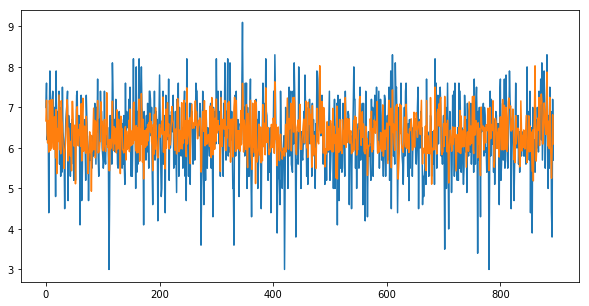

In [13]:
plt.figure(figsize=(10,5))
plt.plot(testY)
plt.plot(predY[0])
plt.show()

In [14]:
print(predY[0])

[[ 6.66683006]
 [ 7.17845917]
 [ 6.40183735]
 [ 6.12152815]
 [ 6.67570114]
 [ 5.89718819]
 [ 7.17107868]
 [ 7.01152611]
 [ 5.94148874]
 [ 7.18926334]
 [ 5.9882946 ]
 [ 6.59069395]
 [ 7.19229412]
 [ 6.02071142]
 [ 5.96677256]
 [ 6.76731491]
 [ 6.54605722]
 [ 5.75535679]
 [ 6.94742775]
 [ 5.36184072]
 [ 6.47799635]
 [ 6.15100956]
 [ 6.76736546]
 [ 7.30558586]
 [ 5.95573521]
 [ 6.91990089]
 [ 5.85443926]
 [ 7.16506195]
 [ 6.71905231]
 [ 6.54921627]
 [ 6.09820747]
 [ 5.92876291]
 [ 5.49498177]
 [ 5.89788818]
 [ 6.01479673]
 [ 6.28034592]
 [ 6.65424919]
 [ 7.18947983]
 [ 7.01668978]
 [ 5.6783123 ]
 [ 6.48501015]
 [ 6.23762083]
 [ 5.96358347]
 [ 5.79700089]
 [ 6.16326141]
 [ 5.43544483]
 [ 7.14795876]
 [ 7.14535713]
 [ 6.65265036]
 [ 6.05111551]
 [ 6.05168819]
 [ 6.56476402]
 [ 5.11446142]
 [ 5.96055126]
 [ 6.95629215]
 [ 7.01668978]
 [ 6.10714769]
 [ 6.0487318 ]
 [ 6.45597363]
 [ 6.32059336]
 [ 6.58361626]
 [ 6.03879166]
 [ 7.09007311]
 [ 5.6783123 ]
 [ 6.85241985]
 [ 7.22736931]
 [ 5.91605

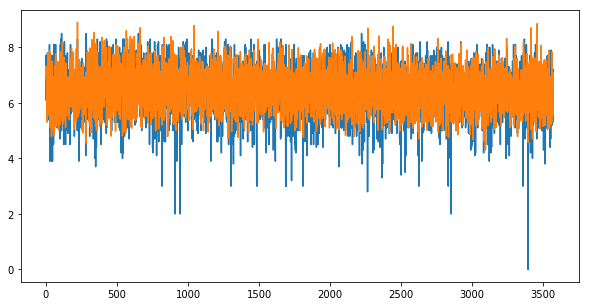

In [15]:
plt.figure(figsize=(10,5))
plt.plot(trainY)
plt.plot(resultY)
plt.show()